Books Recommendation System

Project Motivation
The Arabic book market is a huge market with many readers worldwide. This poses a challenge of finding the right book to read especially since there are limited Arabic-specific recommendation systems available. The goal of this project is to help users discover their next read, based on their interests, preferences, and reading history by building an intelligent recommendation system utilizing the Jamalon Arabic Books Dataset.

students' names: رغد المطيري | شوق القريشي | هيفاء السديري | بتول الفوزان | نوره العريفي |

The goal of the dataset:

The primary goal of using the Jamalon Arabic Books Dataset is to help us develop a robust, AI-driven, personalized recommendation system for Arabic books, enabling more efficient book categorization and enhancing overall user experience. By leveraging this dataset which includes rich metadata such as titles, authors, and genres, the system will provide personalized suggestions and explanations by integrating machine learning and generative AI, classify and categorize content efficiently, and process user inputs

The goal of this project is to develop a recommendation system for Arabic books available on Jamalon, an online bookstore. The objective is to suggest books to users based on attributes such as genre, price, and ratings, along with personal preferences.

In Phase 1, we focused on understanding the problem, exploring the dataset, and performing initial data preprocessing. This included handling missing values, encoding categorical features, and visualizing the dataset to understand the relationships between key attributes.

The source of the dataset:
We are using the Jamalon Arabic Books Dataset, sourced from [Kaggle - Jamalon Arabic Books Dataset](https://www.kaggle.com/datasets/dareenalharthi/jamalon-arabic-books-dataset?resource=download).

General information:
In the Jamalon Arabic Books Dataset, each row represents a book. The dataset consists of 11 columns (variables) and approximately 8980 observations (books).  

Dataset Variables:
- Unique ID: A unique identifier for each book (Numerical).
- Title: The name of the book (Text).
- Author: The author's name (Text).
- Description: A brief description of the book (Text)
- Pages: The total number of pages in the book (Numerical)
- Publication Year: The year the book was published (Numerical)
- Publisher: The name of the publisher (Categorical).
- Cover: The cover type, such as Paperback or Hardcover (Categorical).
- Category: The main category of the book (e.g., Literature, Islamic Books) (Categorical).
- Subcategory: A more specific classification under each category (Categorical).
- Price: The price of the book (Numerical).

The Category and Subcategory columns act as classification labels, organizing books into different genres. These labels are useful for building the recommendation model based on user preferences.


Summary of the dataset:

In [7]:
# 1. Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from langdetect import detect
import re
from IPython.display import display
from tabulate import tabulate

In [8]:
# 2. Loading the Dataset
file_path = r'C:\Users\Raghad\Downloads\BooksDB\jamalon dataset.csv'
df = pd.read_csv(file_path)

In [9]:
df.head(10) 
#Sample of the Dataset

,Unnamed: 0,Title,Author,Description,Pages,Publication year,Publisher,Cover,Category,Subcategory,Price
0,0,فى فقه الصراع على القدس وفلسطين,محمد عمارة,الإسلامية كانت القدس رمز الصراع وبوابة الانتص...,180,2006,دار الشروق – مصر,غلاف ورقي,الأدب والخيال,الأدب الإسلامي,15.00
1,1,الرد على شبهات المستشرقين في السيرة النبوية(3),محمد بن عبد الرزاق اسود,None,86,2017,دار طيبة للنشر والتوزيع,غلاف ورقي,الأدب والخيال,الأدب الإسلامي,15.00
2,2,القصص التربوية عند الشيخ محمد تقي فلسفي,لطيف الراشدي,None,420,0,دار الكاتب العربي للطباعة والنشر,غلاف كرتوني,الأدب والخيال,الأدب الإسلامي,37.50
3,3,باب السلام,الأستاذ الدكتور عبدالوهاب إبراهيم أبو سليمان,None,494,2013,تارة الدولية,غلاف ورقي,الأدب والخيال,الأدب الإسلامي,100.02
4,4,تسبيح الروح,طراد حمادة,None,144,0,دار العلم للطباعة والنشر والتوزيع,غلاف عادي,الأدب والخيال,الأدب الإسلامي,18.75
5,5,خمسون وسيلة لسلامة الصدر,سعد الطخيس,None,184,2016,دار الحضارة للنشر والتوزيع,غلاف كرتوني,الأدب والخيال,الأدب الإسلامي,19.88
6,6,عذراء قريش,جرجي زيدان,"روايات تاريخ الإسلام"" سلسلة من الروايات التار...",176,0,دار البشير للطباعة والنشر والتوزيع,غلاف عادي,الأدب والخيال,الأدب الإسلامي,18.75
7,7,التحفة في أحكام العمرة والمسجد الحرام,فهد العماري,None,358,2017,دار الحضارة للنشر والتوزيع _ السعودية,غلاف ورقي,الأدب والخيال,الأدب الإسلامي,19.88
8,10,رعاية المقاصد في فقه ابي بكر الصديق,التلمساني,None,140,2017,دار طيبة للنشر والتوزيع,غلاف ورقي,الأدب والخيال,الأدب الإسلامي,18.75
9,11,المدخل إلى علوم نهج البلاغة,محسن باقر الموسوي,None,432,0,دار العلوم للتحقيق والطباعة والنشر,غلاف كرتوني,الأدب والخيال,الأدب الإسلامي,33.75


In [10]:
# Count missing values per column
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Column', 'Missing Count']
missing_values['Missing Percentage'] = (missing_values['Missing Count'] / len(df)) * 100

# Display as a table
missing_values

,Column,Missing Count,Missing Percentage
0,Unnamed: 0,0,0.000000
1,Title,0,0.000000
2,Author,0,0.000000
3,Description,574,6.387714
4,Pages,0,0.000000
5,Publication year,0,0.000000
6,Publisher,0,0.000000
7,Cover,0,0.000000
8,Category,0,0.000000
9,Subcategory,0,0.000000


C:\Users\Raghad\AppData\Local\Temp\ipykernel_44572\2462678993.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values['Column'], y=missing_values['Missing Count'], palette="viridis")


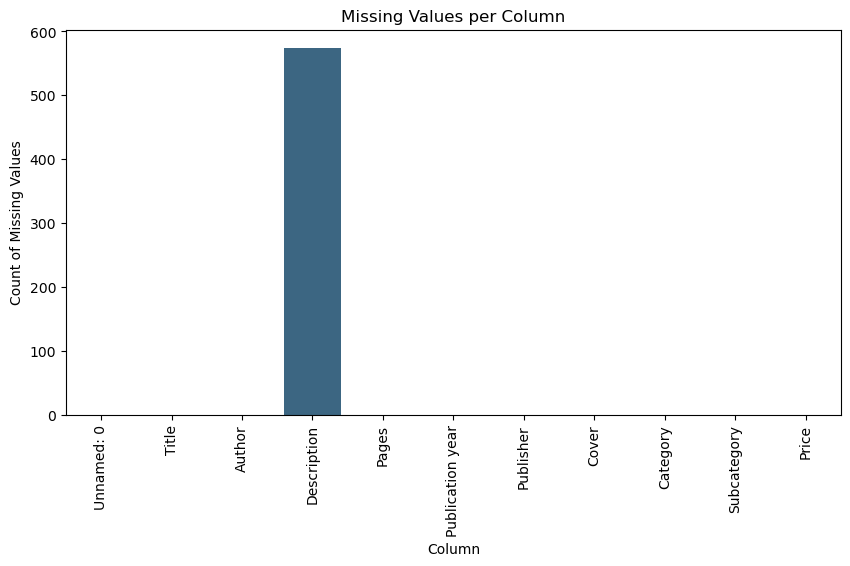

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values['Column'], y=missing_values['Missing Count'], palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Count of Missing Values")
plt.title("Missing Values per Column")
plt.show()

In [12]:
#Count, Mean, Standard, Minimum, Maximum, and Variance

In [13]:
numeric_df = df.select_dtypes(include=[np.number])
summary_stat=numeric_df.describe().T
summary_stat['Variance'] = numeric_df.var()
summary_stat

,count,mean,std,min,25%,50%,75%,max,Variance
Unnamed: 0,8986.0,6090.685845,3153.582548,0.00,3442.75,6504.50,8753.75,11002.00,9.945083e+06
Pages,8986.0,290.197196,550.010609,0.00,144.00,232.00,352.00,41520.00,3.025117e+05
Publication year,8986.0,1446.235366,902.201453,0.00,0.00,2006.00,2015.00,2020.00,8.139675e+05
Price,8986.0,51.504644,62.425666,0.34,18.75,35.63,56.25,937.56,3.896964e+03


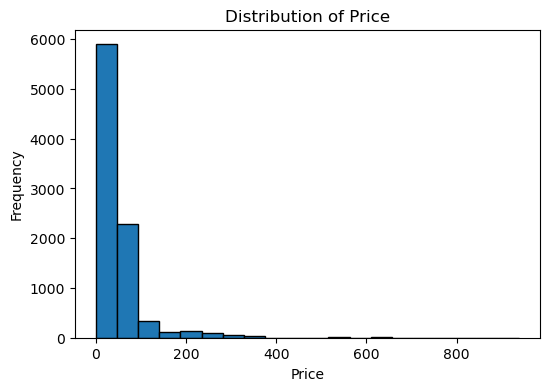

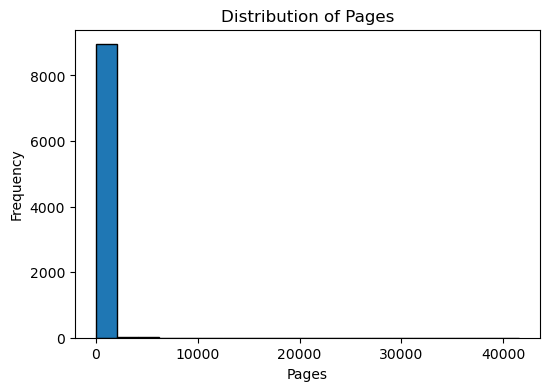

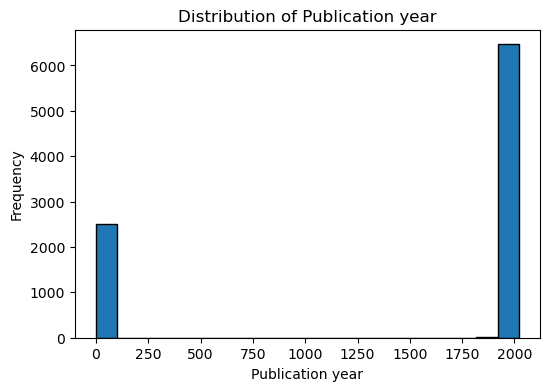

In [79]:
import matplotlib.pyplot as plt

# List of columns to plot
columns_to_plot = ["Price", "Pages", "Publication year"]

# Generate separate plots for each column
for col in columns_to_plot:
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.hist(df[col].dropna(), bins=20, edgecolor="black")  # Histogram
    plt.xlabel(col)  # X-axis label
    plt.ylabel("Frequency")  # Y-axis label
    plt.title(f"Distribution of {col}")  # Title
    plt.show()  # Show each plot separately

EDA (Exploratory Data Analysis) we have analyzed the dataset to detect errors, inconsistencies, missing values, and anomalies before applying data cleaning techniques.  In order to understand the dataset before cleaning, We checked for missing values,duplicates, and inconsistencies and categorical columns to encode

The following preprocessing steps were performed on the dataset:

1- Handling Missing Values: We checked for any null values in the dataset and deleted the rows containing them. Removing rows with missing data helps maintain data integrity and ensures that analysis and models are based on complete information.

2- Duplicate Detection and Removal:We identified duplicate rows and applied a strategy Deduplication Strategy: -For duplicates, the entry with the lowest non-zero price is kept. -If prices are all zero, the most recent publication year is prioritized. -If publication years are the same, the entry with the longest description is retained. to retain the most relevant entry. Removing duplicates avoids data redundancy, improves data quality, and ensures accurate analysis.

3- Unnecessary Column Removal: We removed columns like Unnamed: 0 and Cover as they were not needed for analysis. The Unnamed: 0 column was removed because it simply numbered the rows, which is unnecessary since the dataset already has automatic indexing. The Cover column was removed because it only indicated the type of book cover (e.g., paperback, hardcover, electronic), which was not relevant to our analysis.

4- Language Filtering:We detected English titles using regular expressions (regex) and removed them from the dataset. Since the focus is on Arabic books, removing English titles ensures the dataset is relevant to the project’s objectives.

5- Category Mapping:We mapped book categories to binary-like codes (e.g., "الأدب والخيال" → 0000000000001). This mapping standardizes categories, making them easier to process in machine learning models.

6- Encoding Categorical Features:We applied Label Encoding to the Author, Publisher, and Subcategory columns to convert text data into numerical values. Machine learning models require numerical input; encoding categorical features ensures compatibility with these models.

7- Discretization:We discretized the Pages column into bins (e.g., 0–50, 50–100, etc.) to categorize books based on page ranges. Discretization helps in analyzing trends across different ranges and simplifies complex numerical data.

8- Text Cleaning (Titles & Descriptions):We cleaned the text data by removing Arabic diacritics (Tashkeel), special characters, punctuation marks, and extra spaces. Cleaning text data improves consistency and quality, which is especially important for text analysis and natural language processing (NLP) tasks in phase 2.


In [17]:
# Adjust display settings for better formatting
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_colwidth', None) # Display full content in each cell
pd.set_option('display.expand_frame_repr', False) # Prevent line breaks in tables
pd.set_option('display.width', 1000)       # Adjust the table width


# Check for duplicates
def print_duplicate_stats(df, column):
    # Count the occurrences of each value in the specified column
    duplicates = df[column].value_counts()

    # Print basic duplicate analysis statistics
    print(f"\nDuplicate analysis for {column}:")
    print(f"Total rows: {len(df)}")  # Total number of rows in the dataframe
    print(f"Unique values: {df[column].nunique()}")  # Number of unique values in the specified column
    print(f"Number of duplicated values: {len(df[df[column].duplicated()])}")  # Number of duplicated values


    # If there are any duplicated values, display more details
    if len(duplicates[duplicates > 1]) > 0:
        print("\nMost common duplicates:")
        # Display the top duplicate values in a neat table format
        display(duplicates[duplicates > 1].head().to_frame('Count').reset_index().rename(columns={'index': column}))

        # Show detailed information for some duplicated entries
        print("\nSample of duplicated entries (first duplicates):")
        for title in duplicates[duplicates > 1].head(1).index:
            print(f"\nAll entries for title: {title}")
            
            # Display detailed data for each duplicated title with a clean table style
            duplicated_data = df[df[column] == title][['Title', 'Author', 'Publisher', 'Publication year', 'Price']]
            styled_table = duplicated_data.style.set_table_styles(
                [{'selector': 'th', 'props': [('background-color', '#f7f7f7'), ('font-weight', 'bold')]},
                 {'selector': 'td', 'props': [('text-align', 'center')]}]
            ).set_properties(**{'border': '1px solid black', 'padding': '8px'})
            
            display(styled_table)  # Display the table with better formatting

# Check for duplicated rows in the entire dataframe
print("Check for duplicates:\t" + str(df.duplicated().sum()))

# Perform duplicate analysis for the 'Title' column
print_duplicate_stats(df, 'Title')

Check for duplicates:	0

Duplicate analysis for Title:
Total rows: 8986
Unique values: 8138
Number of duplicated values: 848

Most common duplicates:


,Title,Count
0,دور المنظمات الدولية غير الحكومية في عمليات بناء السلام في إفريقيا بعد انتهاء الحرب الباردة,13
1,صاحب الظل الطويل,12
2,البؤساء,11
3,الإرهاب العالمي والتطرف,11
4,أوروبا والوطن العربي,11



Sample of duplicated entries (first duplicates):

All entries for title:  دور المنظمات الدولية غير الحكومية في عمليات بناء السلام في إفريقيا بعد انتهاء الحرب الباردة


,Title,Author,Publisher,Publication year,Price
2287,دور المنظمات الدولية غير الحكومية في عمليات بناء السلام في إفريقيا بعد انتهاء الحرب الباردة,محمد أحمد,المكتب العربي للمعارف,2017,40.000000
2301,دور المنظمات الدولية غير الحكومية في عمليات بناء السلام في إفريقيا بعد انتهاء الحرب الباردة,محمد أحمد,المكتب العربي للمعارف,2017,40.000000
2303,دور المنظمات الدولية غير الحكومية في عمليات بناء السلام في إفريقيا بعد انتهاء الحرب الباردة,محمد أحمد,المكتب العربي للمعارف,2017,40.000000
2315,دور المنظمات الدولية غير الحكومية في عمليات بناء السلام في إفريقيا بعد انتهاء الحرب الباردة,محمد أحمد,المكتب العربي للمعارف,2017,40.000000
2328,دور المنظمات الدولية غير الحكومية في عمليات بناء السلام في إفريقيا بعد انتهاء الحرب الباردة,محمد أحمد,المكتب العربي للمعارف,2017,40.000000
2339,دور المنظمات الدولية غير الحكومية في عمليات بناء السلام في إفريقيا بعد انتهاء الحرب الباردة,محمد أحمد,المكتب العربي للمعارف,2017,40.000000
2341,دور المنظمات الدولية غير الحكومية في عمليات بناء السلام في إفريقيا بعد انتهاء الحرب الباردة,محمد أحمد,المكتب العربي للمعارف,2017,40.000000
2352,دور المنظمات الدولية غير الحكومية في عمليات بناء السلام في إفريقيا بعد انتهاء الحرب الباردة,محمد أحمد,المكتب العربي للمعارف,2017,40.000000
2355,دور المنظمات الدولية غير الحكومية في عمليات بناء السلام في إفريقيا بعد انتهاء الحرب الباردة,محمد أحمد,المكتب العربي للمعارف,2017,40.000000
2380,دور المنظمات الدولية غير الحكومية في عمليات بناء السلام في إفريقيا بعد انتهاء الحرب الباردة,محمد أحمد,المكتب العربي للمعارف,2017,40.000000


In [18]:
# Value counts and unique values per column
for i in df.columns:
    print(i+"column")
    print(df[i].value_counts())
print("Unique values per column:\n", df.nunique())

Unnamed: 0column
Unnamed: 0
0        1
8007     1
8001     1
8002     1
8003     1
        ..
4752     1
4750     1
4749     1
4748     1
11002    1
Name: count, Length: 8986, dtype: int64
Titlecolumn
Title
 دور المنظمات الدولية غير الحكومية في عمليات بناء السلام في إفريقيا بعد انتهاء الحرب الباردة    13
 صاحب الظل الطويل                                                                               12
 البؤساء                                                                                        11
 الإرهاب العالمي والتطرف                                                                        11
 أوروبا والوطن العربي                                                                           11
                                                                                                ..
 أسس الفيزياء الاشعاعية في الطب النووي                                                           1
 مسائل محلولة في الصوت والضوء                                                                    1
 

In [19]:
# Summary statistics of pages, publication year, price
print(df.describe())

         Unnamed: 0         Pages  Publication year        Price
count   8986.000000   8986.000000       8986.000000  8986.000000
mean    6090.685845    290.197196       1446.235366    51.504644
std     3153.582548    550.010609        902.201453    62.425666
min        0.000000      0.000000          0.000000     0.340000
25%     3442.750000    144.000000          0.000000    18.750000
50%     6504.500000    232.000000       2006.000000    35.630000
75%     8753.750000    352.000000       2015.000000    56.250000
max    11002.000000  41520.000000       2020.000000   937.560000


In [20]:
# 4. Data Cleaning
clean_df = df.copy()

In [21]:
# Function to detect English titles
def is_english(text):
    try:
        english_pattern = re.compile(r'[a-zA-Z]')
        return bool(english_pattern.search(str(text)))
    except:
        return False
        
# Function to print removal stats
def print_removal_stats(df_before, df_after, step_name):
    rows_removed = len(df_before) - len(df_after)
    print(f"\n{step_name}:")
    print(f"Rows removed: {rows_removed}")
    print(f"Rows remaining: {len(df_after)}")
    if rows_removed > 0:
        removed_df = df_before[~df_before.index.isin(df_after.index)]
        print(removed_df['Title'].head())

In [22]:
# Function to choose which duplicate to keep
def choose_best_duplicate(group):
    if len(group) == 1:
        return group.iloc[0]  # No duplicates, return as is

    # Keep the one with the lowest non-zero price
    non_zero_prices = group[group['Price'] > 0]
    if not non_zero_prices.empty:
        return non_zero_prices.sort_values(by='Price').iloc[0]

    # If all prices are zero, keep the most recent publication
    if group['Publication year'].nunique() > 1:
        return group.sort_values(by='Publication year', ascending=False).iloc[0]

    # If publication years are the same, keep the longest description
    group['Description_Length'] = group['Description'].fillna('').apply(len)
    return group.sort_values(by='Description_Length', ascending=False).iloc[0]

# Remove duplicate entries while keeping the best version

The columns Unnamed: 0 and Cover were removed because they do not provide any meaningful information relevant to the book recommendation system.
Unnamed: 0 is an automatically generated index column that adds no analytical value,
while Cover does not contribute to the recommendation process based on attributes like Description, Category.
Removing these unnecessary columns simplifies the dataset, improves data processing efficiency, and keeps the focus on relevant features.

In [24]:
# Removing unnecessary columns
#Drop unnamed and Cover columns
clean_df = clean_df.drop(columns=['Unnamed: 0', 'Cover'], errors='ignore')

In [25]:
# Remove duplicate entries while keeping the best version
# This process ensures that for books with the same title and same publisher, we retain the most relevant entry
print("\nRemoving duplicates...")
df_before = clean_df.copy()  # Create a copy of the dataset to compare before and after removal

# Group data by both 'Title' and 'Publisher' to identify duplicates correctly
clean_df = clean_df.groupby(['Title', 'Publisher'], as_index=False).apply(choose_best_duplicate).reset_index(drop=True)

# Print removal statistics to show how many rows were deleted and how many remain
print_removal_stats(df_before, clean_df, "Deduplication removal")


Removing duplicates...

Deduplication removal:
Rows removed: 541
Rows remaining: 8445
8445         المنطق الواضح في شرح السلم المنورق
8446    طريقة التحليل النفسي والعقيدة الفرويدية
8447                            مشاكلنا النفسية
8448                           الموجز في المنطق
8449                         علم الفراسة الحديث
Name: Title, dtype: object


C:\Users\Raghad\AppData\Local\Temp\ipykernel_44572\2534041396.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clean_df = clean_df.groupby(['Title', 'Publisher'], as_index=False).apply(choose_best_duplicate).reset_index(drop=True)


In [26]:
# Identify and remove English titles as the dataset is likely focused on Arabic books
print("\nBefore English title removal:")
print("Total rows:", len(clean_df))  # Display the total number of rows before removal

# Apply the 'is_english' function to detect titles written in English
english_titles = clean_df[clean_df['Title'].apply(is_english)]
print("Found English titles:", len(english_titles))  # Show the count of English titles found

# If English titles are present, display a sample of them
if len(english_titles) > 0:
    print("Sample of English titles to be removed:")
    print(english_titles['Title'].head())  # Display the first few English titles

# Remove English titles from the dataset
# The tilde (~) operator negates the condition to keep only non-English titles
df_before = clean_df.copy()  # Copy the dataset before removal for comparison
clean_df = clean_df[~clean_df['Title'].apply(is_english)]  # Filter out English titles

# Print statistics to show how many English titles were removed
print_removal_stats(df_before, clean_df, "Removing English titles")


Before English title removal:
Total rows: 8445
Found English titles: 234
Sample of English titles to be removed:
0     "Al Muwatta (The Approved) الموطأ للإمام مالك بن أنس برواية الليثي [انكليزي/عربي] لونان"
1                     "Apercu des Grandes Ames de LHumanite du Prophete adam a LImam Al-Mahdi"
2                            "De la douceur de vivre a seville a la douleur de lexil a aghmat"
3                                                                             "LIBAN 1880-1914
4                                             "La Revolution Tunisienne semparer de lhistoire"
Name: Title, dtype: object

Removing English titles:
Rows removed: 234
Rows remaining: 8211
0     "Al Muwatta (The Approved) الموطأ للإمام مالك بن أنس برواية الليثي [انكليزي/عربي] لونان"
1                     "Apercu des Grandes Ames de LHumanite du Prophete adam a LImam Al-Mahdi"
2                            "De la douceur de vivre a seville a la douleur de lexil a aghmat"
3                                 

In [27]:
#Clean Description
print("\nBefore Description cleaning:")
print("Null values:", clean_df['Description'].isna().sum())
print("'None' string values (including spaces):", 
      clean_df['Description'].astype(str).str.strip().isin(['None', 'nan', '']).sum())

df_before = clean_df.copy()
clean_df = clean_df[
    clean_df['Description'].notna() & 
    ~clean_df['Description'].astype(str).str.strip().isin(['None', 'nan', '']) & 
    (clean_df['Description'].astype(str).str.strip() != '')
]
print_removal_stats(df_before, clean_df, "Removing invalid descriptions")


Before Description cleaning:
Null values: 570
'None' string values (including spaces): 4155

Removing invalid descriptions:
Rows removed: 4155
Rows remaining: 4056
16       "أعمال المؤتمر السادس للثقافة الشعبية العربية الثقافة الشعبية في عالم متغير"
17               "إسرائيل في المعركة وفي الحلبة الدولية، وثائق مؤتمر هرتزيليا الثاني"
18                                                           "إسرائيل والأمم المتحدة"
19                                   "إيباك الأجندة الأميركية لمصلحة الكيان الصهيوني"
20     "الإطار الفكري والتطبيقي للتصميم المحاسبي اللبناني العام في المؤسسات والشركات"
Name: Title, dtype: object


In [28]:
# Text Cleaning Function to remove diacritics, symbols, and punctuation
def clean_arabic_text(text):
    # Remove Arabic diacritics (Tashkeel)
    text = re.sub(r'[\u0617-\u061A\u064B-\u0652]', '', text)
    
    # Remove punctuations and special characters
    text = re.sub(r"[!\"#\$%&'\(\)\*\+,\-./:;<=>?@\[\]\\^_`{|}~،؛؟«»]", '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply cleaning to the Description column
clean_df['Description'] = clean_df['Description'].astype(str).apply(clean_arabic_text)

# Display a sample of the cleaned data
print(clean_df[['Description']].head())

In [29]:
# Apply cleaning to the Title column
clean_df['Title'] = clean_df['Title'].astype(str).apply(clean_arabic_text)

# Display a sample of the cleaned Title data
print(clean_df[['Title']].head())

                                                                                      Title
23                                          التشبيك وميثاق الممارسة في عمل المنظمات الأهلية
24  التقارير الوصفية لأوضاع الطفولة المبكرة في البلدان العربية حسب المنظور الشمولي التكاملي
28                                           الطريقة الطبيعية لتنظيم الولادات وسيلة بيلينغس
31                                                دلائل التفسير في مهد التغيير تفسير حم عسق
34                                                                            فتاة القيروان


In [30]:
#Clean Author field
df_before = clean_df.copy()
clean_df = clean_df[
    ~clean_df['Author'].astype(str).str.strip().isin(['لا يوجد', 'None', 'nan', '']) & 
    clean_df['Author'].notna() & 
    (clean_df['Author'].astype(str).str.strip() != '')
]
print_removal_stats(df_before, clean_df, "Removing invalid authors")


Removing invalid authors:
Rows removed: 46
Rows remaining: 4010
35     مؤتمر هرتسيليا العاشر وثائق وأوراق عمل إسرائيل في خطر وجودي
75                                       5 تجارب مسرحية من البحرين
569                                   أطلس العالم أطلس جغرافي مصور
610                                                      أكسكالبور
943                                 استراتيجيات التسويق الإلكتروني
Name: Title, dtype: object


In [31]:
# Clean Publication Year
df_before = clean_df.copy()
clean_df = clean_df[
    (clean_df['Publication year'] != 0) & 
    clean_df['Publication year'].notna() & 
    (clean_df['Publication year'] >= 1800) & 
    (clean_df['Publication year'] <= 2024)
]
print_removal_stats(df_before, clean_df, "Removing invalid years")


Removing invalid years:
Rows removed: 711
Rows remaining: 3299
24    التقارير الوصفية لأوضاع الطفولة المبكرة في البلدان العربية حسب المنظور الشمولي التكاملي
28                                             الطريقة الطبيعية لتنظيم الولادات وسيلة بيلينغس
34                                                                              فتاة القيروان
38                                                            من طفل إلى طفل في العالم العربي
43                                                         100 منزل رائع من نخبة منازل العالم
Name: Title, dtype: object


In [32]:
# 5. Category Mapping
category_map = {
    "الأدب والخيال": "0000000000001",
    "الكتب الإسلامية": "0000000000010",
    "الاقتصاد والأعمال": "0000000000100",
    "الفلسفة": "0000000001000",
    "الصحافة والإعلام": "0000000010000",
    "الكتب السياسية": "0000000100000",
    "العلوم والطبيعة": "0000001000000",
    "الأسرة والطفل": "0000010000000",
    "السير والمذكرات": "0000100000000",
    "الفنون": "0001000000000",
    "التاريخ والجغرافيا": "0010000000000",
    "الرياضة والتسلية": "0100000000000",
    "الشرع والقانون": "1000000000000"
}

clean_df['Category'] = clean_df['Category'].map(category_map)


In [33]:
from sklearn.preprocessing import LabelEncoder
# Encode Authors using Label Encoding
label_encoder = LabelEncoder()
clean_df['Author'] = label_encoder.fit_transform(clean_df['Author'].astype(str))

# Display the number of unique authors
unique_authors = clean_df['Author'].unique()
print(f"Number of unique authors: {len(unique_authors)}")

# Display a sample of the encoded data
print(clean_df[['Author']].head())

Number of unique authors: 2737
    Author
23    2073
31     700
42    1618
45    1454
46    1700


In [34]:
# Encode Publishers using Label Encoding
clean_df['Publisher'] = label_encoder.fit_transform(clean_df['Publisher'].astype(str))

# Display the number of unique publishers
unique_publishers = clean_df['Publisher'].unique()
print(f"Number of unique publishers: {len(unique_publishers)}")

# Display a sample of the encoded data
print(clean_df[['Publisher']].head())


Number of unique publishers: 538
    Publisher
23        145
31         90
42        145
45         34
46        137


In [35]:
# Encode Publishers using Label Encoding
clean_df['Subcategory'] = label_encoder.fit_transform(clean_df['Subcategory'].astype(str))

# Display the number of unique publishers
unique_publishers = clean_df['Subcategory'].unique()
print(f"Number of unique publishers: {len(unique_publishers)}")

# Display a sample of the encoded data
print(clean_df[['Subcategory']].head())

Number of unique publishers: 76
    Subcategory
23           65
31           54
42           71
45           74
46           68


In [36]:
# 6. Final verification
print("\nFinal verification:")
print("Checking for English titles:")
remaining_english = clean_df[clean_df['Title'].apply(is_english)]
if len(remaining_english) > 0:
    print("WARNING: Still found English titles:")
    print(remaining_english['Title'].head())
else:
    print("No English titles remaining")

print("\nChecking for 'None' values in Description:")
none_desc = clean_df[clean_df['Description'].astype(str).str.strip().isin(['None', 'nan', ''])]
if len(none_desc) > 0:
    print("WARNING: Still found rows with 'None' in Description:")
    print(none_desc[['Title', 'Description']].head())
else:
    print("No 'None' values found in Description")

print("Checking for duplicates")
print_duplicate_stats(clean_df, 'Title')

# Save the cleaned dataset
# Clean any remaining whitespace
for col in clean_df.columns:
    if clean_df[col].dtype == object:
        clean_df[col] = clean_df[col].astype(str).str.strip()

# Save with explicit encoding and quoting
clean_df.to_csv("~/Downloads/outputnotebook.csv", 
                index=False, 
                encoding='utf-8-sig',
                quoting=1)


# Verify the saved file
print("\nVerifying saved file:")
verification_df = pd.read_csv("~/Downloads/outputnotebook.csv")
print("Final row count:", len(verification_df))
print("\nSample of final data:")
print(verification_df[['Title', 'Author', 'Description']].head(2).to_string())


Final verification:
Checking for English titles:
No English titles remaining

Checking for 'None' values in Description:
No 'None' values found in Description
Checking for duplicates

Duplicate analysis for Title:
Total rows: 3299
Unique values: 3199
Number of duplicated values: 100

Most common duplicates:


,Title,Count
0,التحليل الإحصائي للتباين الإقليمي في مستويات البطالة ومعدلاتها في الأردن,3
1,الإدارة بالأهداف,3
2,الإعلام البيئي,3
3,التحليل العددي,3
4,الحركة الإسلامية في كردستان,3



Sample of duplicated entries (first duplicates):

All entries for title: التحليل الإحصائي للتباين الإقليمي في مستويات البطالة ومعدلاتها في الأردن


,Title,Author,Publisher,Publication year,Price
1563,التحليل الإحصائي للتباين الإقليمي في مستويات البطالة ومعدلاتها في الأردن,2085,180,2019,67.500000
1564,التحليل الإحصائي للتباين الإقليمي في مستويات البطالة ومعدلاتها في الأردن,2085,202,2008,75.010000
1565,التحليل الإحصائي للتباين الإقليمي في مستويات البطالة ومعدلاتها في الأردن,2085,257,2004,123.760000



Verifying saved file:
Final row count: 3299

Sample of final data:
                                             Title  Author                                                                                                                                                                                                                                                                                                                                                                                                                               Description
0  التشبيك وميثاق الممارسة في عمل المنظمات الأهلية    2073  تقرير يوثق أعمال ورشة عمل 1995 عن محاولة صياغة ميثاق ممارسة يحدد أصول التعامل فيما بين الهيئات الأهلية ومع الهيئات الممولة وفيه عرض لمجموعة غني ة من الخبرات في التشبيك ومجموعة من التحديات والتوصيات تساهم في بلورة خطوات عملية في مجال التشبيك بين المنظمات الأهلية على المستوى الإقليمي عرضة من الخبرات في التشبيك ومجموعة من التحديات والتوصيات تساهم في بلورة خطوات عملية في مجال التشبيك بين 

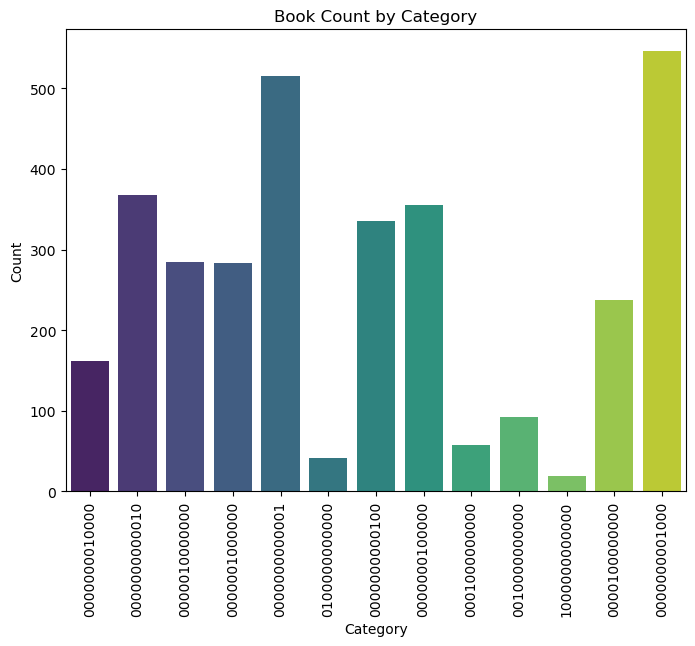

In [37]:
# 7. Relationships visualization

# **Book Count by Category**
# do we have enough books for each catogory is a catogory overpresented ?
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_df, x='Category', palette='viridis', hue='Category', legend=False)
plt.title("Book Count by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=90) 
plt.show()

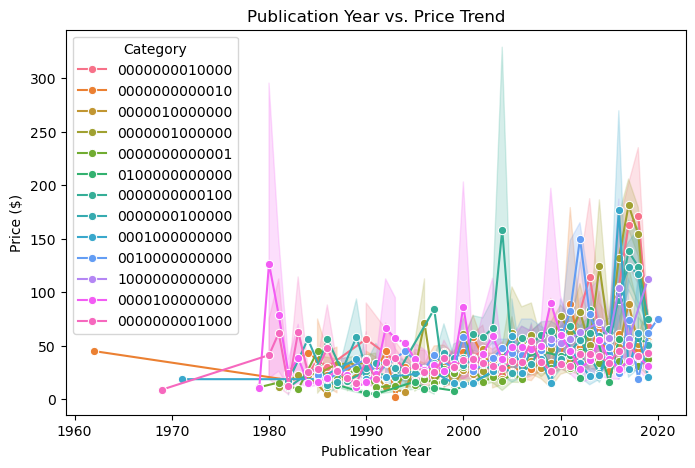

In [38]:
# **Year vs. Price**
# Does newer books are more expensive ?
plt.figure(figsize=(8, 5))
sns.lineplot(data=clean_df, x='Publication year', y='Price', marker='o', hue='Category')
plt.title("Publication Year vs. Price Trend")
plt.xlabel("Publication Year")
plt.ylabel("Price ($)")
plt.show()

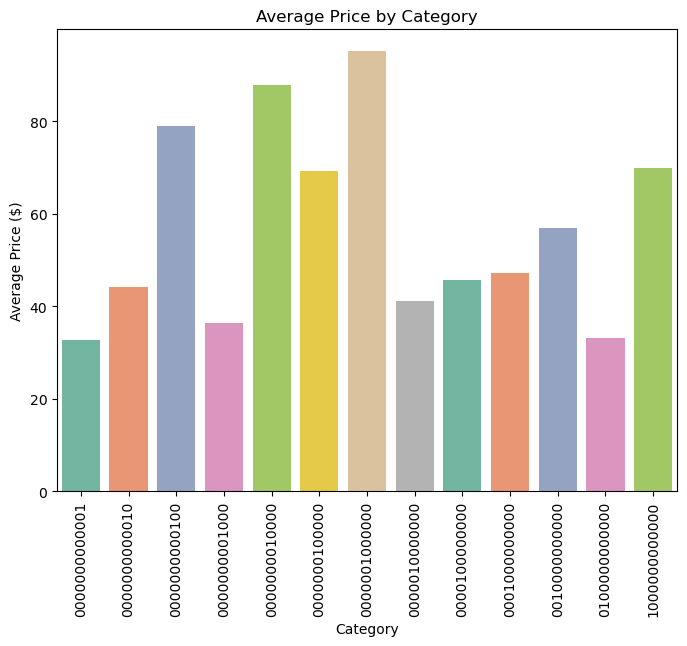

In [39]:
# **Price vs Category**
plt.figure(figsize=(8, 6))
df_grouped = clean_df.groupby('Category')['Price'].mean().reset_index()
sns.barplot(data=df_grouped, x='Category', y='Price', hue='Category', palette='Set2', legend=False)
plt.title("Average Price by Category")
plt.xlabel("Category")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=90)  
plt.show()

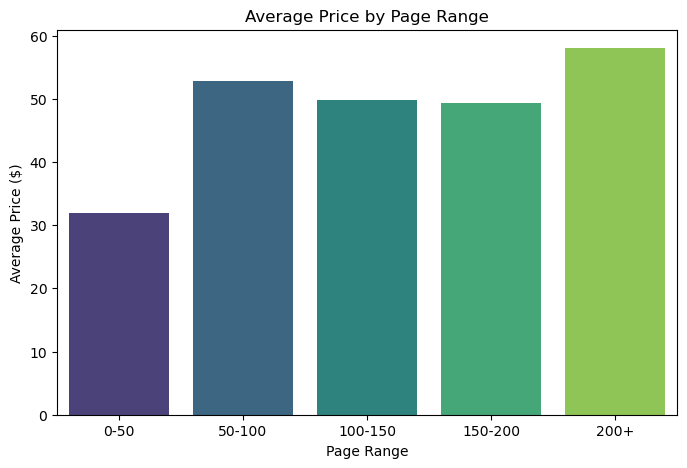

In [40]:
# **Price vs Pages** 
bins = [0, 50, 100, 150, 200, float('inf')]  
labels = ['0-50', '50-100', '100-150', '150-200', '200+']
clean_df['Page Range'] = pd.cut(clean_df['Pages'], bins=bins, labels=labels, right=False)

df_grouped = clean_df.groupby('Page Range', observed=False)['Price'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=df_grouped, x='Page Range', y='Price', palette='viridis', hue='Page Range', legend=False)
plt.title("Average Price by Page Range")
plt.xlabel("Page Range")
plt.ylabel("Average Price ($)")
plt.show()

In [41]:
# list all columns names
columns_list = clean_df.columns.tolist()
columns_list

['Title',
 'Author',
 'Description',
 'Pages',
 'Publication year',
 'Publisher',
 'Category',
 'Subcategory',
 'Price',
 'Page Range']

In [42]:
from IPython.display import display

In [43]:
clean_df.reset_index(drop=True, inplace=True)
display(clean_df.head())

,Title,Author,Description,Pages,Publication year,Publisher,Category,Subcategory,Price,Page Range
0,التشبيك وميثاق الممارسة في عمل المنظمات الأهلية,2073,تقرير يوثق أعمال ورشة عمل 1995 عن محاولة صياغة ميثاق ممارسة يحدد أصول التعامل فيما بين الهيئات الأهلية ومع الهيئات الممولة وفيه عرض لمجموعة غني ة من الخبرات في التشبيك ومجموعة من التحديات والتوصيات تساهم في بلورة خطوات عملية في مجال التشبيك بين المنظمات الأهلية على المستوى الإقليمي عرضة من الخبرات في التشبيك ومجموعة من التحديات والتوصيات تساهم في بلورة خطوات عملية في مجال التشبيك بين المنظمات الأهلية على المستوى الإقليمي,40,2003,145,0000000010000,65,16.88,0-50
1,دلائل التفسير في مهد التغيير تفسير حم عسق,700,دلائل التفسير في معد التغيير رؤى بيانية على مكامن الدين جوانب مضامين أركان رؤى في القرآن الصورية لأشكال الحروف عرض,208,2017,90,0000000000010,54,37.80,200+
2,100,1618,تعاني كثير من الأسر اليوم من مشكلات جوهرية وخلافات حادة تقوم بين الأزواج تسرق سعادتهم وتؤدي بأسرهم إلى نتائج وخيمة بعدما انعقدت الآمال على حياة رسموها بأحلامهم ويمكن لتلك الأحلام الذهبية أن تتحقق لو أن الأزواج تفهموا بوعي وظيفتهم التي رسمها الله لهم عرضرسموها بأحلامهم ويمكن لتلك الأحلام الذهبية أن تتحقق لو أن الأزواج تفهموا بوعي وظيفتهم التي رسمها الله لهم,280,2012,145,0000010000000,71,28.13,200+
3,100 وسيلة طبيعية للتزود بالطاقة والحيوية,1454,لا بد أن يعيش المرء فترات من الإرهاق والتعب فلا يجد حتى الوقت لاستعادة طاقته غير إنه في هذا الكتاب ستجدون كل الوسائل الممكنة والسهلة لحث جهازكم والحصول على الطاقة كما يمكنكم الاختيار بين مختلف الأطعمة والأغذية والمشروبات والتمارين والمداواة العطرية وتقنيات التدليك فكل وسيلة في هذا الكتاب تهدف لمساعدة الجسد والعقل معا بطريقة صحية دون اللجوء إلى المنبهات عرضوالحصول على الطاقة كما يمكنكم الاختيار بين مختلف الأطعمة والأغذية والمشروبات والتمارين والمداواة العطرية وتقنيات التدليك فكل وسيلة في هذا الكتاب تهدف لمساعدة الجسد والعقل معا بطريقة صحية دون اللجوء إلى المنبهات,80,1994,34,0000001000000,74,8.44,50-100
4,100 يوم في معتقل أنصار,1700,بعد 33 عاما على إصدار كتاب 100 يوم في معتقل أنصار أقدم للرأي العام طبعة جديدة ومنقحة صحيح أن الكتاب يغطي مرحلة من تاريخنا بعضها أصبح م ن الماضي ولكن عندما تعيد قراءته تشعر أن أحداثه وتفاصيله مازالت راهنة وشاخصة أمامك في مكان آخر وفي سجون وبلاد أخرى الجلاد هو نفسه والتعذيب هو نفسه وامتهان الكرامة الإنسانية هو ذاته والذي تغير هو تطوير تقنية القتل والإعدام والتعذيب تقرأ الكتاب تنقب في سطوره تقفز فوق أسلاكه ووديانه فتجد نفسك أحد مجانينه مازلت أسيرا في خيمة تتقاسم البيضة والصفعة أو الدمعة مع عشرة أشخاص أو أكثر مازلت جثة تائهة خرقة بقايا عظام في مقبرة كمشة غبار تلاحقها الغيوم مازلت رقما للتعداد عرضن الماضي ولكن عندما تعيد قراءته تشعر أن أحداثه وتفاصيله مازالت راهنة وشاخصة أمامك في مكان آخر وفي سجون وبلاد أخرى الجلاد هو نفسه والتعذيب هو نفسه وامتهان الكرامة الإنسانية هو ذاته والذي تغير هو تطوير تقنية القتل والإعدام والتعذيب تقرأ الكتاب تنقب في سطوره تقفز فوق أسلاكه ووديانه فتجد نفسك أحد مجانينه مازلت أسيرا في خيمة تتقاسم البيضة والصفعة أو الدمعة مع عشرة أشخاص أو أكثر مازلت جثة تائهة خرقة بقايا عظام في مقبرة كمشة غبار تلاحقها الغيوم مازلت رقما للتعداد,264,2017,137,0000000000001,68,33.75,200+
